In [28]:
import numpy as np

In [29]:
# build train set
mul1, sigma1 = [1, 0], [[1, 0.75], [0.75, 1]]
mul2, sigma2 = [0, 1], [[1, 0.75], [0.75, 1]]
size = 500

train_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
train_data2D_1_label = np.zeros((size, 1))
print(train_data2D_1_label.shape)

train_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
train_data2D_2_label = np.ones((size, 1))
X_train = np.vstack([train_data2D_1, train_data2D_2])
y_train = np.vstack([train_data2D_1_label, train_data2D_2_label])
print(X_train[:5], X_train[-5:])
print(y_train[:5], y_train[-5:])

(500, 1)
[[ 2.09374185  1.53134544]
 [ 0.24108229 -0.02257292]
 [ 2.02287171  2.02967829]
 [ 1.49393741  0.1232896 ]
 [ 1.37101352 -0.23580922]] [[ 0.22659484  0.81978801]
 [ 1.45116257  1.45085759]
 [ 0.01616226  1.07280237]
 [-0.57073394  0.46539831]
 [-0.34546737  1.65021903]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [30]:
# build test set
mul1, sigma1 = [1, 0], [[1, 0.75], [0.75, 1]]
mul2, sigma2 = [0, 1], [[1, 0.75], [0.75, 1]]
size = 500

test_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
test_data2D_1_label = np.zeros((size, 1))
print(test_data2D_1_label.shape)

test_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
test_data2D_2_label = np.ones((size, 1))
X_test = np.vstack([test_data2D_1, test_data2D_2])
y_test = np.vstack([test_data2D_1_label, test_data2D_2_label])
print(X_test[:5], X_test[-5:])
print(y_test[:5], y_test[-5:])

(500, 1)
[[ 1.24504692  0.13734901]
 [ 1.87515513  0.70312458]
 [ 1.00630349  0.25881155]
 [-0.01564971 -1.08521709]
 [ 0.95205082  0.01307674]] [[ 0.09858419  1.91148621]
 [ 0.73460602  0.84962569]
 [-0.52981287  0.13790422]
 [-0.54206764 -0.15347962]
 [-0.08326352  1.18946564]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [31]:
import pandas as pd
import numpy as np
print(pd.__version__)

def myNB(X, y, X_test, y_test):    
    def norm(x, mean, std):
        return 1/(np.sqrt(2*np.pi)*std)*np.exp(-(x-mean)**2/2*(std**2))
        
    X_train, y_train = pd.DataFrame(X, columns=['Feature1', 'Feature2']), pd.DataFrame(y, columns=['Class'])
    X_test, y_test = pd.DataFrame(X_test, columns=['Feature1', 'Feature2']), pd.DataFrame(y_test, columns=['Class'])
    y_unique = y_train['Class'].unique()
    train_set = pd.concat([X_train, y_train], axis=1)
    prior = np.zeros(len(y_unique))
    conditional = np.reshape(np.zeros(len(y_unique)*len(X_train.columns)*2), (len(y_unique), len(X_train.columns), 2))
    

    for i in range(0,len(y_unique)):
        prior[i]=(sum(y_train['Class']==y_unique[i])+1)/(len(y_train['Class'])+len(y_unique))
#     print("The prior probability of each class is: ", prior)

    for i, h in enumerate(X_train.columns.values.tolist()):
        for j in range(0,len(y_unique)):
            class_feature = train_set[h].loc[(train_set['Class']==y_unique[j])]
            mean = np.mean(class_feature)
            var = np.std(class_feature)
            conditional[i][j] = [mean, var]
#             print("mean and standard variance of current feature is: ", h, j, mean, var)
#     print(conditional)
#     print("Prior distribution is: ", prior)
    pred_probs = []
    for idx, row in X_test.iterrows():
        probs = []
        for cIdx, pri in enumerate(prior): # class 0 1
            for fIdx, feat in enumerate(row): # feature 0 1
                pri *= norm(feat, conditional[fIdx][cIdx][0], conditional[fIdx][cIdx][1])
            probs.append(pri)
        pred_probs.append(probs)
    pred = [np.argmax(p) for p in pred_probs]
    # calculate error rate
#     print(np.array(pred).shape)
#     print(y_test.to_numpy().shape)
    err = np.mean(np.array(pred)!=y_test.to_numpy().squeeze())
#     print(err)
    
    return pred, conditional, err
    
pred, posterior, err = myNB(X_train, y_train, X_test, y_test)

1.0.3


In [32]:
# perform the experiments 10 times
avg_err, run_time = 0, 10
for i in range(run_time):
    train_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
    train_data2D_1_label = np.zeros((size, 1))

    train_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
    train_data2D_2_label = np.ones((size, 1))
    X_train = np.vstack([train_data2D_1, train_data2D_2])
    y_train = np.vstack([train_data2D_1_label, train_data2D_2_label])
    
    test_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
    test_data2D_1_label = np.zeros((size, 1))

    test_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
    test_data2D_2_label = np.ones((size, 1))
    X_test = np.vstack([test_data2D_1, test_data2D_2])
    y_test = np.vstack([test_data2D_1_label, test_data2D_2_label])
    
    pred, posterior, err = myNB(X_train, y_train, X_test, y_test)
    print("current time error: ", err)
    avg_err += err/run_time

print("The average error: ", avg_err)


current time error:  0.117
current time error:  0.057
current time error:  0.101
current time error:  0.061
current time error:  0.086
current time error:  0.08
current time error:  0.079
current time error:  0.08
current time error:  0.071
current time error:  0.09
The average error:  0.08219999999999998


Accuracy = 0.912
Precision = 0.896
Metrics = 0.926
Confusion Matrix = [[464  52]
 [ 36 448]]


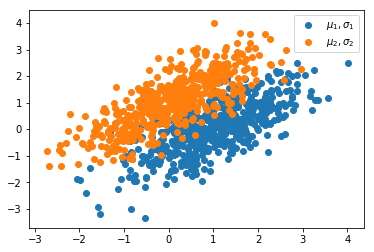

In [34]:
from sklearn import metrics
import matplotlib.pyplot as plt

train_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
train_data2D_1_label = np.zeros((size, 1))

train_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
train_data2D_2_label = np.ones((size, 1))
X_train = np.vstack([train_data2D_1, train_data2D_2])
y_train = np.vstack([train_data2D_1_label, train_data2D_2_label])

test_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
test_data2D_1_label = np.zeros((size, 1))

test_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
test_data2D_2_label = np.ones((size, 1))
X_test = np.vstack([test_data2D_1, test_data2D_2])
y_test = np.vstack([test_data2D_1_label, test_data2D_2_label])

pred, posterior, err = myNB(X_train, y_train, X_test, y_test)

# report the metrics
acc = metrics.accuracy_score(np.array(pred), y_test.squeeze())
print("Accuracy = %.3f" % (sum([p==a for p, a in zip(np.array(pred), y_test.squeeze())])/len(np.array(pred))))
precision = metrics.precision_score(np.array(pred), y_test.squeeze())
print("Precision = %.3f" % precision)
recall = metrics.recall_score(np.array(pred), y_test.squeeze())
print("Metrics = %.3f" % recall)
cm = metrics.confusion_matrix(np.array(pred), y_test.squeeze())
print("Confusion Matrix = {}".format(cm))

# draw data points
plt.scatter(train_data2D_1[:, 0], train_data2D_1[:, 1], label='$\mu_1, \sigma_1$')
plt.scatter(train_data2D_2[:, 0], train_data2D_2[:, 1], label='$\mu_2, \sigma_2$')
plt.legend()
plt.show()

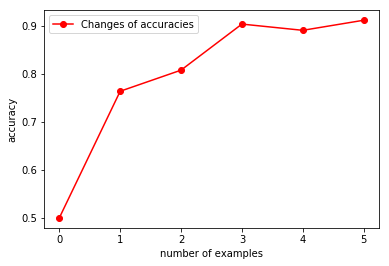

In [35]:
# change the number of examples
accs = []
x_axis = [0, 1, 2, 3, 4, 5]
for n in [10,20,50,100,300,500]:
    train_set_1 = train_data2D_1[:n]
    train_label1 = np.zeros((n, 1))
    train_set_2 = train_data2D_2[:n]
    train_label2 = np.ones((n, 1))
    X_train = np.vstack([train_set_1, train_set_2])
    y_train = np.vstack([train_label1, train_label2])
    pred, posterior, err = myNB(X_train, y_train, X_test, y_test)
    acc = metrics.accuracy_score(np.array(pred), y_test.squeeze())
    accs.append(acc)


plt.plot(x_axis, accs, 'ro-', label='Changes of accuracies')
plt.xlabel("number of examples")
plt.ylabel("accuracy")
plt.legend()
plt.show()    

In [37]:
# change the number of examples
train_data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=700)
train_data2D_1_label = np.zeros((700, 1))

train_data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=300)
train_data2D_2_label = np.ones((300, 1))

train_set_1 = train_data2D_1[:700]
train_label1 = np.zeros((700, 1))
train_set_2 = train_data2D_2[:300]
train_label2 = np.ones((300, 1))
X_train = np.vstack([train_set_1, train_set_2])
y_train = np.vstack([train_label1, train_label2])
pred, posterior, err = myNB(X_train, y_train, X_test, y_test)
acc = metrics.accuracy_score(np.array(pred), y_test.squeeze())
print("The accuracy when  change the number of examples in class 0 as 700 and the other as 300:", acc)

The accuracy when  change the number of examples in class 0 as 700 and the other as 300: 0.834


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


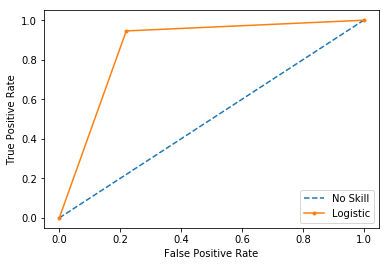

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



In [2]:
# Generate tfidf matrix
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import pandas as pd

review=pd.read_csv('./data/Amazon_Reviews.csv')
review['Label']=review['Label'].map({'__label__2 ':1,'__label__1 ':0})
docs_num = review.shape[0]

# Preprocessing for tokenize, stopwords removal, lemmatization
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

tokenizer=RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()

for idx, row in review.iterrows():
    tmp = []
    tokens = tokenizer.tokenize(row['Review'])
    for w in tokens:
        if w.lower() not in stopwords.words('english'):
            tmp.append(lemmatizer.lemmatize(w.lower()))
    review.iloc[idx, 0] = ' '.join(tmp)

DF = {}
for idx, row in review.iterrows():
    for w in row['Review'].split():
        try:
            DF[w].add(idx)
        except:
            DF[w] = {idx}
DF = {k: len(v) for k, v in DF.items()}
vocab = [k for k, v in DF.items()]
vocab_len = len(vocab)

from collections import Counter
import numpy as np

TFIDF = {}
for idx, row in review.iterrows():
    rw = row['Review'].split()
    cnt = Counter(rw)
    for w in np.unique(rw):
        tf = cnt[w]/len(rw)
        df = DF[w]
        idf = np.log((docs_num+1)/(df+1))
        TFIDF[(idx, w)] = tf*idf

n = 0
for k, v in TFIDF.items():
    if n<5:
        print(k, v)
        n += 1
    else:
        break
        
"""
P: like(54) great(38) good(35) love(33) best(20)
N: however(15) disappointed(11) waste(10) poor(10) hard(8)
"""
def gen_vector(idx, review):
    Q = np.zeros(10)
    P = np.zeros(10)
    ten_words = ['like', 'great', 'good', 'love', 'best', 
                 'however', 'disappointed', 'waste', 'poor', 'hard']
    for w in ten_words:
        for k, v in TFIDF.items():
            if k[0]==idx and k[1]==w:
                Q[ten_words.index(w)] = v
        for word in review:
            if word==w:
                P[ten_words.index(w)] += 1
                
    return P, Q

tfidf_vectors = []
count_vectors = []
for idx, row in review.iterrows():
    rw = row['Review'].split()
    P, Q = gen_vector(idx, rw)
    tfidf_vectors.append([Q, row['Label']])
    count_vectors.append(P)

for i in range(10):
    print("tf-idf vector for document {} is {}".format(i, tfidf_vectors[i]))

You should consider upgrading via the 'pip install --upgrade pip' command.


[nltk_data] Downloading package wordnet to /Users/zzy824/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zzy824/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '_') 0.09332677950844283
(0, 'anyone') 0.057561492565462814
(0, 'away') 0.07449793816650496
(0, 'back') 0.054780089388707126
(0, 'beautiful') 0.08197509898030969
tf-idf vector for document 0 is [array([0.        , 0.        , 0.        , 0.        , 0.05008433,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 1]
tf-idf vector for document 1 is [array([0.        , 0.        , 0.        , 0.        , 0.09799108,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 1]
tf-idf vector for document 2 is [array([0.02129965, 0.        , 0.        , 0.        , 0.03266369,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 1]
tf-idf vector for document 3 is [array([0.05878704, 0.        , 0.        , 0.        , 0.0300506 ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 1]
tf-idf vector for document 4 is [array([0.        , 0.        , 0.03727823, 0.        , 0.04899554,
       0.        , 0.        , 0.        , 0. 

In [38]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

dataset = [[v[0], v[1]] for v in tfidf_vectors]
kf = KFold(n_splits=5)
avg_acc, avg_precision, avg_recall = [], [], []
for train_idx, test_idx in kf.split(dataset):
    gnb = GaussianNB()
    X_train, y_train = [dataset[i][0] for i in train_idx], [dataset[i][1] for i in train_idx]
    X_test, y_test = [dataset[i][0] for i in test_idx], [dataset[i][1] for i in test_idx]
    pred = gnb.fit(X_train, y_train).predict(X_test)
    
    acc = metrics.accuracy_score(np.array(pred), y_test)
    print("Accuracy = %.3f" % (sum([p==a for p, a in zip(np.array(pred), y_test)])/len(np.array(pred))))
    precision = metrics.precision_score(np.array(pred), y_test)
    print("Precision = %.3f" % precision)
    recall = metrics.recall_score(np.array(pred), y_test)
    print("Recall = %.3f" % recall)
    print('-----'*4)
    avg_acc.append(acc)
    avg_precision.append(precision)
    avg_recall.append(recall)

print("Average Accuracy is: ", sum(avg_acc)/5)
print("Precision Accuracy is: ", sum(avg_precision)/5)
print("Recall Accuracy is: ", sum(avg_recall)/5)

Accuracy = 0.675
Precision = 0.955
Recall = 0.636
--------------------
Accuracy = 0.625
Precision = 1.000
Recall = 0.583
--------------------
Accuracy = 0.700
Precision = 0.913
Recall = 0.677
--------------------
Accuracy = 0.725
Precision = 1.000
Recall = 0.667
--------------------
Accuracy = 0.641
Precision = 1.000
Recall = 0.622
--------------------
Average Accuracy is:  0.6732051282051282
Precision Accuracy is:  0.9735177865612649
Recall Accuracy is:  0.6370809225647934
